# Heart disease Prediction

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

%matplotlib inline
sns.set()
#https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [309]:
heart= pd.read_csv('heart.csv')

In [310]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



- age - age in years
- sex - (1 = male; 0 = female)
- cp - chest pain type (4 values)
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg - resting electrocardiographic results (values: 0,1,2) (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach - maximum heart rate achieved
- exang - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.
- slope - the slope of the peak exercise ST segment 5(Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- ca - number of major vessels (0-3) colored by flourosopy
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
- target - have disease or not (1=yes, 0=no)


In [198]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [311]:
#heart.dtypes

print(f'There are {heart.shape[0]} observations and {heart.shape[1]} variables')
print(f'There are {len(heart.select_dtypes(include=[np.number]).columns.tolist())} numeric variables') 
print(f'Average age of Population is {round(heart.age.mean(),2)}')
print(f'Maximum number of population lying between {heart.age.quantile(0.5)} and {heart.age.quantile(0.75)} years')




There are 303 observations and 14 variables
There are 14 numeric variables
Average age of Population is 54.37
Maximum number of population lying between 55.0 and 61.0 years


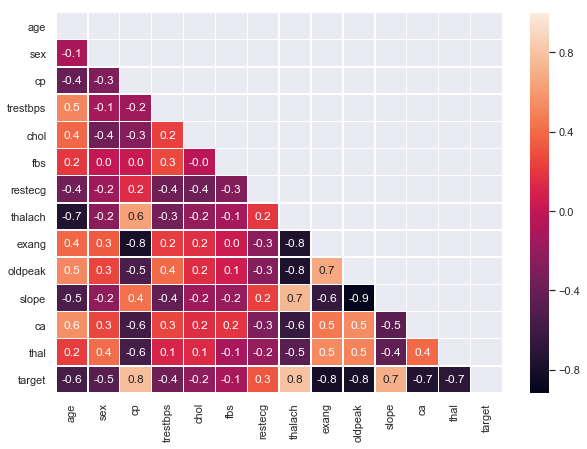

In [312]:
# Generate a mask for the upper triangle
cor=heart.corr()
f,ax = plt.subplots(figsize=(10, 7))
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cor.corr(),mask=mask,annot=True,linewidths=.5, fmt= '.1f',ax=ax)

plt.show()

Text(0, 0.5, 'Frequency')

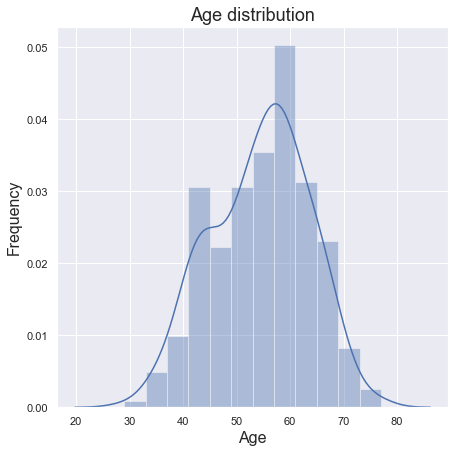

In [200]:
plt.figure(figsize=(7,7))
sns.distplot(heart.age)
plt.title('Age distribution', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

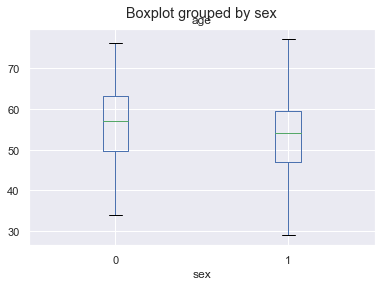

In [201]:
#We can see visualization of statistical calculations.
heart.boxplot(column="age", by="sex")
# ages value by sex
plt.show()



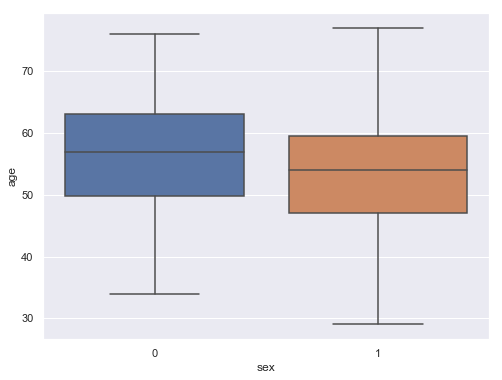

In [313]:
plt.figure(num=None, figsize=(8, 6))

# specify hue="categorical_variable"
sns.boxplot(x='sex', y='age', data=heart)
plt.show()

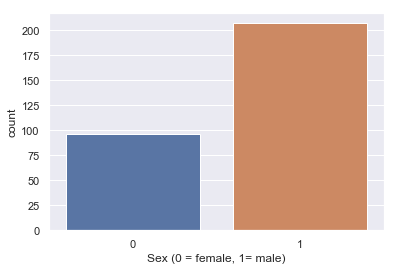

In [302]:
sns.countplot(x='sex', data=heart)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

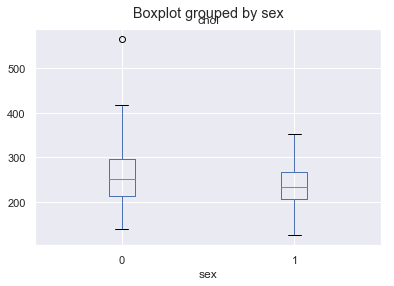

In [293]:
#We can see visualization of statistical calculations.
heart.boxplot(column="chol", by="sex")
# ages value by sex
plt.show()


cp(chest pain),thalch and slope are highly corelated with the target.

# Vizualisation

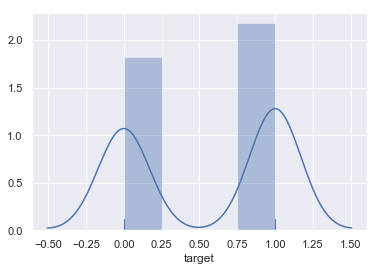

In [295]:
sns.distplot(heart['target'],rug=True)
plt.show()

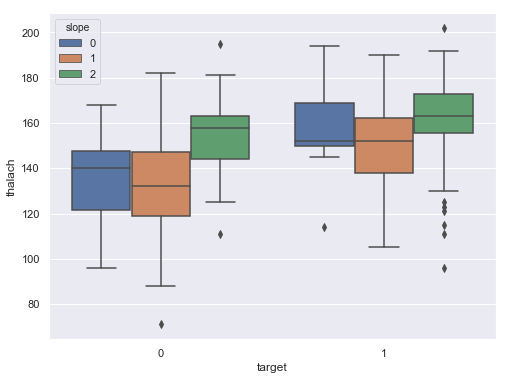

In [296]:
plt.figure(num=None, figsize=(8, 6))

# specify hue="categorical_variable"
sns.boxplot(x='target', y='thalach', hue="slope", data=heart)
plt.show()

# Classification

In [203]:
heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [204]:
nbNoDisease = len(heart[heart.target == 0])
nbDisease = len(heart[heart.target == 1])
print(f' Percentage of healthy patients: {round(nbNoDisease / (len(heart.target))*100,2)}%')
print(f' Percentage of patients that have heart disease: {round(nbDisease / (len(heart.target))*100,2)}%')


 Percentage of healthy patients: 45.54%
 Percentage of patients that have heart disease: 54.46%


In [205]:
nbFemale = len(heart[heart.sex == 0])
nbMale = len(heart[heart.sex == 1])
print(f' Percentage of female fatients: {round(nbFemale / (len(heart.sex))*100,2)}%')
print(f' Percentage of male patients: {round(nbMale / (len(heart.sex))*100,2)}%')


 Percentage of female fatients: 31.68%
 Percentage of male patients: 68.32%


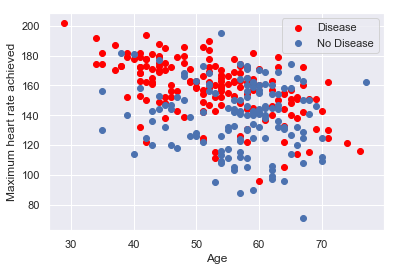

In [206]:
plt.scatter(x=heart.age[heart.target==1], y=heart.thalach[(heart.target==1)], c="red")
plt.scatter(x=heart.age[heart.target==0], y=heart.thalach[(heart.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum heart rate achieved")
plt.show()

- 'Target': classifies if patients have heart disease or not according to diverse features
- Goal: create a model which predict if patient has heart disease or not (logistic regression) 

In [207]:
# Create Dummy variables for 'cp', 'thal', 'slope'
#cp => Chest pain type (4 values)
#slope => The slope of the peak exercise ST segment
#thal => 3 = normal; 6 = fixed defect; 7 = reversable defect

a = pd.get_dummies(heart['cp'], prefix = "cp")
b = pd.get_dummies(heart['thal'], prefix = "thal")
c = pd.get_dummies(heart['slope'], prefix = "slope")

frames = [heart, a, b, c]
heart = pd.concat(frames, axis = 1)
heart.head()




,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [208]:
heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


# Logistic regression

In [270]:
X = heart.iloc[:, :10].values
y=heart.target.values

# normalize
#X=(X - np.min(X))/(np.max(X)-np.min(X))

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)


In [272]:
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [277]:
y_lr = lr.predict(X_test)

In [274]:
accuracy_score(y_test, y_pred)

0.8360655737704918

In [275]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[25  4]
 [ 6 26]]


In [260]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

   micro avg       0.84      0.84      0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [261]:
y_pred = lr.predict([[63,1,145,233,1,0,150,0,2.3,0]])
#y_pred = lr.predict([[37,1,130,250,0,1,187,0,3.5,0]])

y_pred

array([1])

# KNN Classification


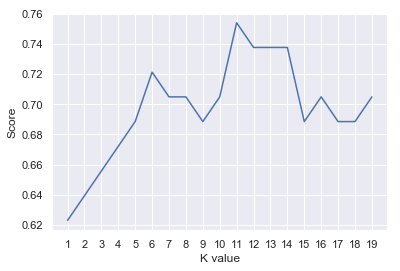

Maximum KNN Score is 75.41%


In [279]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

print("Maximum KNN Score is {:.2f}%".format((max(scoreList))*100))


In [280]:

heart_bis=heart.drop(columns = ['cp', 'thal', 'slope'])
X =heart_bis.drop(['target'], axis = 1)
y=heart_bis.target.values

x = (X - np.min(X))/(np.max(X)-np.min(X)).values
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 0)


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
knn.score(X_test, y_test)
y_knn = knn.predict(X_test)

# Decision Tree Algorithm¶

In [281]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(X_test, y_test)*100))
y_dtc = dtc.predict(X_test)


Decision Tree Test Accuracy 80.33%


From the results it can be seen that KNN and SVM usually have accuracy ranging from 60%-70%. While ogistic regression have accuracy of 75%-85%.
For this data Logistic Regression seem to be better suited.


# Random Forest Classification¶


In [282]:
# Random Forest Classification
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(X_test,y_test)*100))

y_rf = rf.predict(X_test)

Random Forest Algorithm Accuracy Score : 88.52%


# Comparing models

In [288]:

cm_lr = confusion_matrix(y_test,y_lr)
cm_knn = confusion_matrix(y_test,y_knn)
cm_dtc = confusion_matrix(y_test,y_dtc)
cm_rf = confusion_matrix(y_test,y_rf)

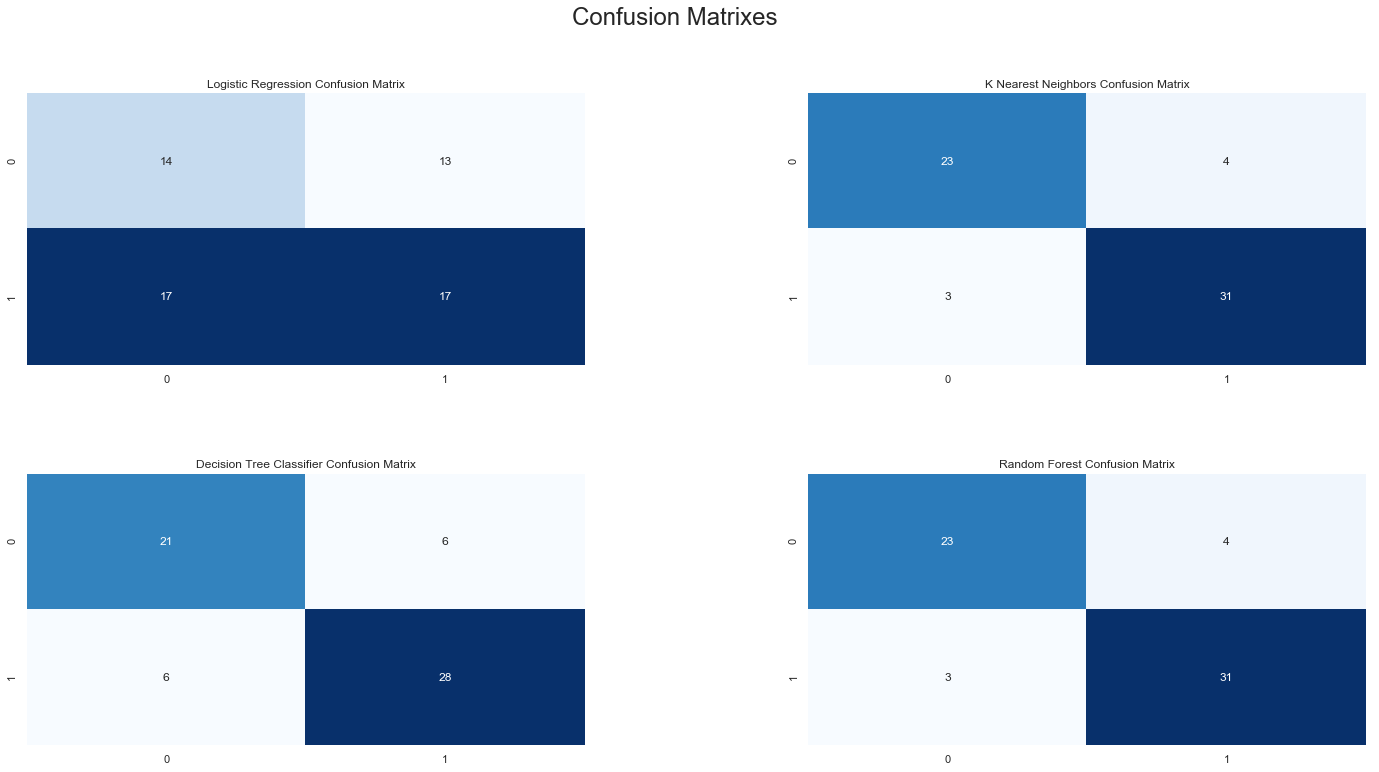

In [291]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,2,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,2,3)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,2,4)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.show()
